In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import xtrack as xt
import numpy as np

In [3]:
env = xt.Environment()
env.particle_ref = xt.Particles(kinetic_energy0=200e6)

### Define elements

In [4]:
# Element geometry
n_bends = 16
env['ang_mb'] = 2*np.pi/n_bends
env['l_mb'] = 1.65
env['l_mq'] = 0.35

env.vars.default_to_zero = True # Undefined variables in env are automatically 
                                # set to zero.

env.new('mb', xt.RBend,      length='l_mb', angle='ang_mb', k0_from_h=True)
env.new('mq', xt.Quadrupole, length='l_mq');

In [5]:
# Quadrupole families
env.new('qfa', 'mq', k1= 'kqfa')
env.new('qfb', 'mq', k1= 'kqfb')
env.new('qd',  'mq', k1= 'kqd');

### Build lattice cells

In [6]:
cell_a = env.new_line(length=7.405, components=[
    env.place('qfa', at=0.3875),
    env.place('mb', at=1.8125),
    env.place('qd', at=3.2925),
    env.place('mb', at=5.0475),
    env.place('qfa', at=6.3275),
])

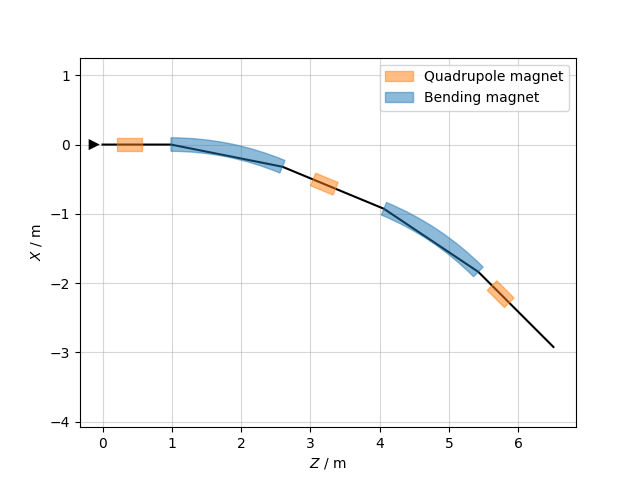

In [7]:
cell_a.survey().plot()

In [8]:
cell_b = env.new_line(name='cell_b', length=8.405, components=[
    env.place('qfb', at=1.2725),
    env.place('mb', at= 2.7275),
    env.place('qd', at=4.8575),
    env.place('mb', at=6.5125),
    env.place('qfb', at=7.7925),
])

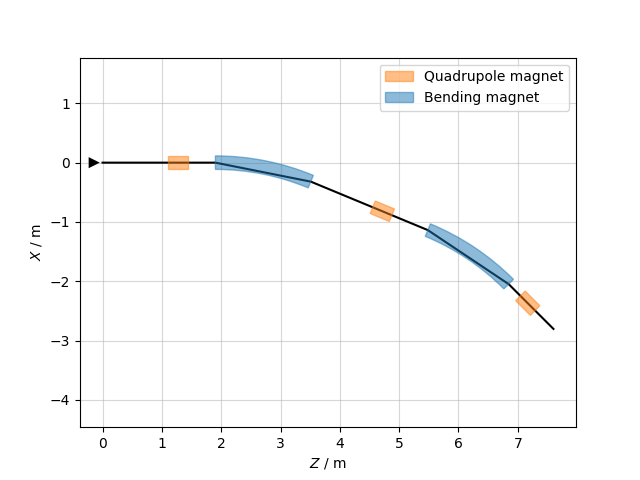

In [9]:
cell_b.survey().plot()

### Build an arc

In [10]:
# concatenate the two cells
arc = cell_a + cell_b 

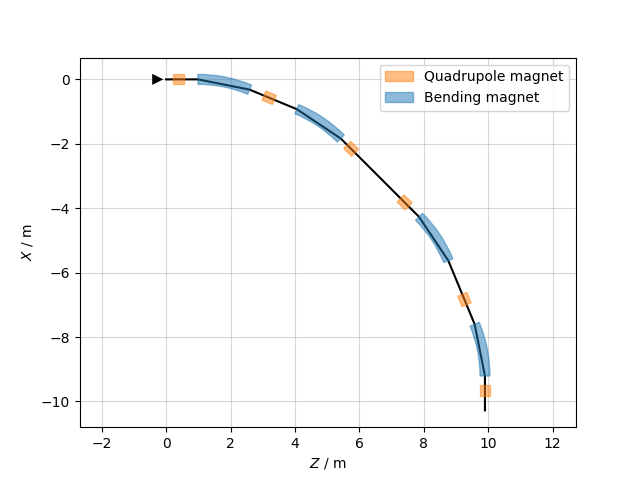

In [11]:
arc.survey().plot()

### Build a straight sections

In [12]:
long_straight = env.new_line(length=2., components=[
    env.new('mid.lss', xt.Marker, at=1.)
])
short_straight = env.new_line(length=1., components=[
    env.new('mid.sss', xt.Marker, at=1.)
])

### Assemble the ring

In [13]:
half_ring = (long_straight
             + arc
             + short_straight
             - arc # mirror symmetric lattice
            )
ring = 2 * half_ring

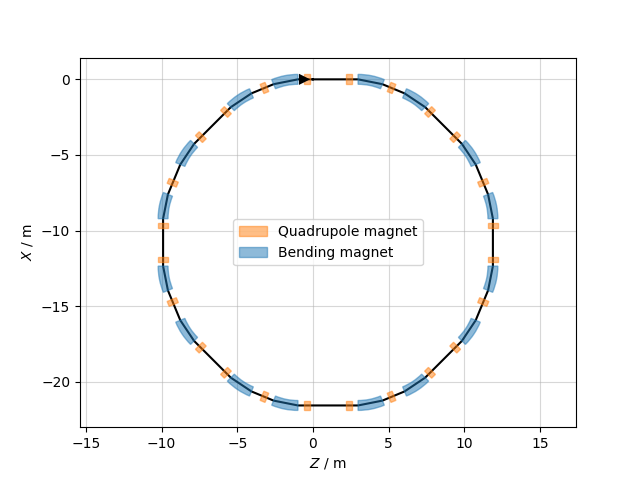

In [14]:
ring.survey().plot()

### Replace repeated elements (give all elements unique names)

In [15]:
ring.replace_all_repeated_elements()

### Inspect beamline table

In [16]:
tt = ring.get_table()

In [17]:
# Inspect all quadrupoles
tt_quad = tt.rows[tt.element_type=='Quadrupole']
tt_quad.cols['s_start s_center s_end']

Table: 24 rows, 4 cols
name        s_start      s_center         s_end
qfa.0        2.2125        2.3875        2.5625
qd.0         5.1175        5.2925        5.4675
qfa.1        8.1525        8.3275        8.5025
qfb.0       10.5025       10.6775       10.8525
qd.1        14.0875       14.2625       14.4375
qfb.1       17.0225       17.1975       17.3725
qfb.2       19.2475       19.4225       19.5975
qd.2        22.1825       22.3575       22.5325
qfb.3       25.7675       25.9425       26.1175
qfa.2       28.1175       28.2925       28.4675
qd.3        31.1525       31.3275       31.5025
qfa.3       34.0575       34.2325       34.4075
qfa.4       36.8325       37.0075       37.1825
qd.4        39.7375       39.9125       40.0875
qfa.5       42.7725       42.9475       43.1225
qfb.4       45.1225       45.2975       45.4725
qd.5        48.7075       48.8825       49.0575
qfb.5       51.6425       51.8175       51.9925
qfb.6       53.8675       54.0425       54.2175
qd.6        56.80

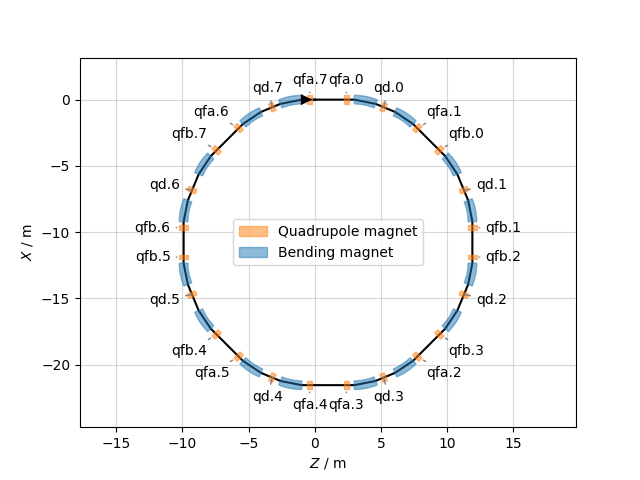

In [18]:
# Tag all quadrupoles in survey plot
sv = ring.survey()
sv.plot(labels=tt_quad.name);

### Define and install sextupoles

In [19]:
# Magnet type
env.new('ms', xt.Sextupole, length=0.1)

# Magnet instances
env.new('msf.1', 'ms', k2='ksf.1')
env.new('msf.2', 'ms', k2='ksf.2')
env.new('msd.1', 'ms', k2='ksd.1')
env.new('msd.2', 'ms', k2='ksd.2');

In [20]:
ring.insert([
    env.place('msf.1', at=-0.2, from_='qfb.0@start'),
    env.place('msf.2', at=-0.2, from_='qfb.4@start'),
    env.place('msd.1', at=0.3,  from_='qd.2@end'),
    env.place('msf.2', at=0.3,  from_='qd.6@end')])

Slicing line:   0%|          | 0/98 [00:00<?, ?it/s]

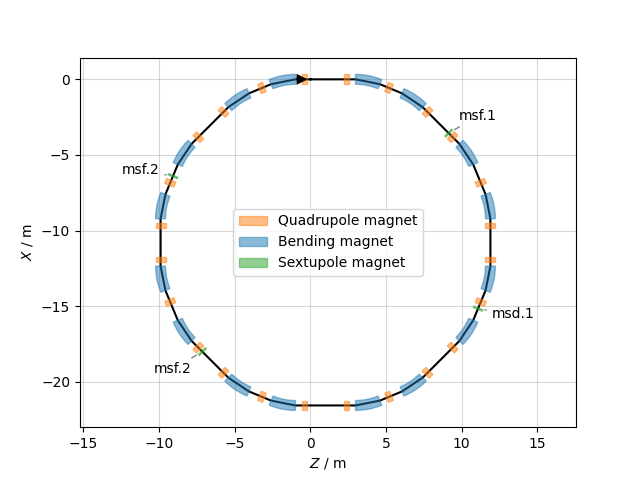

In [21]:
# Inspect sextupoles in the survey
sv = ring.survey()
sv.plot(labels=['msf.1', 'msf.2', 'msd.1', 'msd.2'])

In [22]:
# Define two sextupole circuits (each with two magnets)
env['ksf.1'] = 'ksf'
env['ksf.2'] = 'ksf'
env['ksd.1'] = 'ksd'
env['ksd.2'] = 'ksd'

## Inspect circuit structure

In [23]:
# Entities contrilled by one knob
env.info('ksf')

#  vars['ksf']._get_value()
   vars['ksf'] = 0.0

#  vars['ksf']._expr is None

#  vars['ksf']._find_dependant_targets()
   vars['ksf.2']
   element_refs['msf.2'].k2
   vars['ksf.1']
   element_refs['msf.1'].k2



In [24]:
# Inspect knob controlling one magnet
env.info('msf.1')

Element of type:  Sextupole
name                value                                   expr         
k2                  0.0                                     vars['ksf.1']
k2s                 0.0                                     None         
length              0.1                                     None         
order               5                                       None         
inv_factorial_order 0.008333333333333333                    None         
knl                 [0. 0. 0. 0. 0. 0.]                     None         
ksl                 [0. 0. 0. 0. 0. 0.]                     None         
edge_entry_active   0                                       None         
edge_exit_active    0                                       None         
_sin_rot_s          -999.0                                  None         
_cos_rot_s          -999.0                                  None         
_shift_x            0.0                                     None         
_shift_y  

### Install RF cavity

In [25]:
env.new('rf1', xt.Cavity)
ring.insert('rf1', at=0.5, from_='qfa.3@start')

Slicing line:   0%|          | 0/106 [00:00<?, ?it/s]

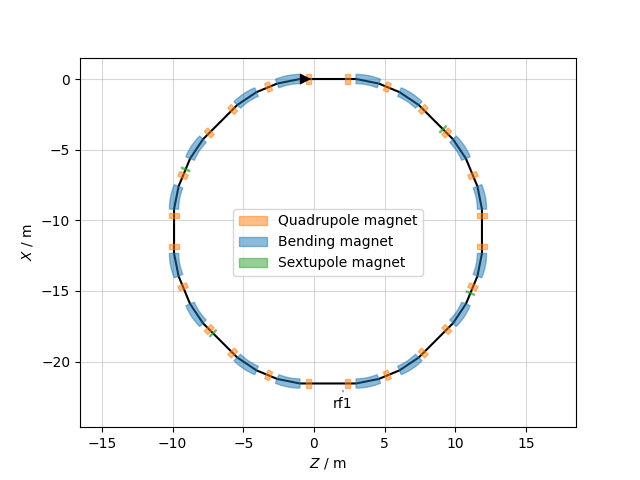

In [26]:
sv = ring.survey()
sv.plot(labels=['rf1'])

### Save lattice to json file

In [27]:
env['ring'] = ring
env.to_json('pimm.json')